In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
ds_salaries_df=pd.read_csv("ds_salaries.csv")

In [3]:
ds_salaries_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
ds_salaries_df.shape

(607, 12)

In [5]:
ds_salaries_df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
ds_salaries_df.isnull().sum(axis=0)

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
ds_salaries_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
ds_salaries_df[["salary_in_usd","remote_ratio"]].describe()

,salary_in_usd,remote_ratio
count,607.000000,607.00000
mean,112297.869852,70.92257
std,70957.259411,40.70913
min,2859.000000,0.00000
25%,62726.000000,50.00000
50%,101570.000000,100.00000
75%,150000.000000,100.00000
max,600000.000000,100.00000


In [9]:
ds_salaries_df["salary_by_month"]=ds_salaries_df["salary_in_usd"]/12

In [10]:
ds_salaries_df["salary_by_month"].describe()

count      607.000000
mean      9358.155821
std       5913.104951
min        238.250000
25%       5227.166667
50%       8464.166667
75%      12500.000000
max      50000.000000
Name: salary_by_month, dtype: float64

In [11]:
ds_salaries_df[["remote_ratio","salary_by_month"]].corr()

,remote_ratio,salary_by_month
remote_ratio,1.000000,0.132122
salary_by_month,0.132122,1.000000


In [12]:
pd.crosstab(ds_salaries_df["job_title"], columns="Count")

col_0,Count
job_title,
3D Computer Vision Researcher,1
AI Scientist,7
Analytics Engineer,4
Applied Data Scientist,5
Applied Machine Learning Scientist,4
BI Data Analyst,6
Big Data Architect,1
Big Data Engineer,8
Business Data Analyst,5


In [13]:
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    607 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    int64  
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
 12  salary_by_month     607 non-null    float64
dtypes: float64(1), int64(5), object(7)
memory usage: 61.8+ KB


Entendiendo los datos:

Eliminando valores no intereantes

In [14]:
ds_salaries_df.drop(["salary", "salary_currency","salary_in_usd"], axis= 1, inplace=True)

Graficando

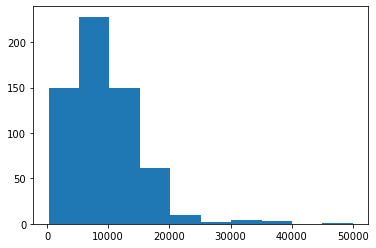

In [15]:
plt.hist(ds_salaries_df["salary_by_month"])
plt.show()

In [16]:
ds_salaries_df.salary_by_month.mean()

9358.155820977485

En Promedio se gana 10000 como DS

In [17]:
ds_salaries_df.groupby(["job_title"])["salary_by_month"].mean()

job_title
3D Computer Vision Researcher                 450.750000
AI Scientist                                 5511.297619
Analytics Engineer                          14583.333333
Applied Data Scientist                      14637.916667
Applied Machine Learning Scientist          11839.062500
BI Data Analyst                              6229.597222
Big Data Architect                           8308.583333
Big Data Engineer                            4331.166667
Business Data Analyst                        6390.933333
Cloud Data Engineer                         10387.250000
Computer Vision Engineer                     3701.611111
Computer Vision Software Engineer            8770.722222
Data Analyst                                 7741.088488
Data Analytics Engineer                      5399.937500
Data Analytics Lead                         33750.000000
Data Analytics Manager                      10594.523810
Data Architect                              14822.825758
Data Engineer        

In [18]:
ds_salaries_df.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

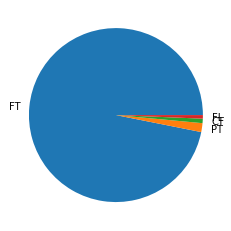

In [19]:
plt.pie(ds_salaries_df.employment_type.value_counts(), labels=ds_salaries_df.employment_type.value_counts().index)
plt.show()

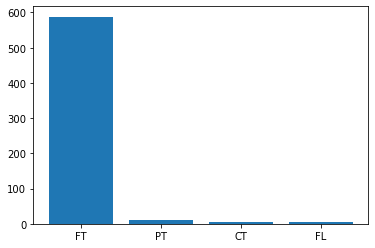

In [20]:
plt.bar(ds_salaries_df.employment_type.value_counts().index,ds_salaries_df.employment_type.value_counts())
plt.show()

La gran mayoria de los DS trabajn FULL TIME

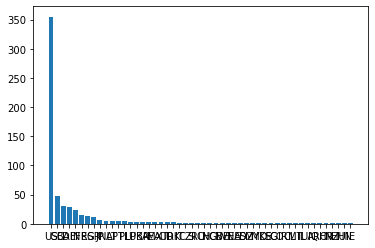

In [21]:
plt.bar(ds_salaries_df.company_location.value_counts().index, ds_salaries_df.company_location.value_counts())
plt.show()

La gran mayoria de los trabajos son en EEUU

In [22]:
ds_salaries_df[ds_salaries_df.company_location=="US"].salary_by_month.mean()

12004.605164319248

El salario promedio de EEUU 12000 es un poco mayor al salario promedio general 10000

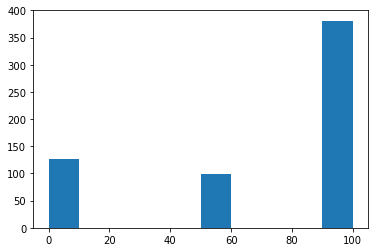

In [23]:
plt.hist(ds_salaries_df["remote_ratio"])
plt.show()

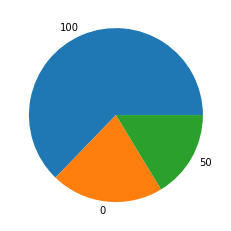

In [24]:
plt.pie(ds_salaries_df.remote_ratio.value_counts(), labels=ds_salaries_df.remote_ratio.value_counts().index)
plt.show()

In [25]:
ds_salaries_df.corr()

,Unnamed: 0,work_year,remote_ratio,salary_by_month
Unnamed: 0,1.000000,0.886550,0.095000,0.167025
work_year,0.886550,1.000000,0.076314,0.170493
remote_ratio,0.095000,0.076314,1.000000,0.132122
salary_by_month,0.167025,0.170493,0.132122,1.000000


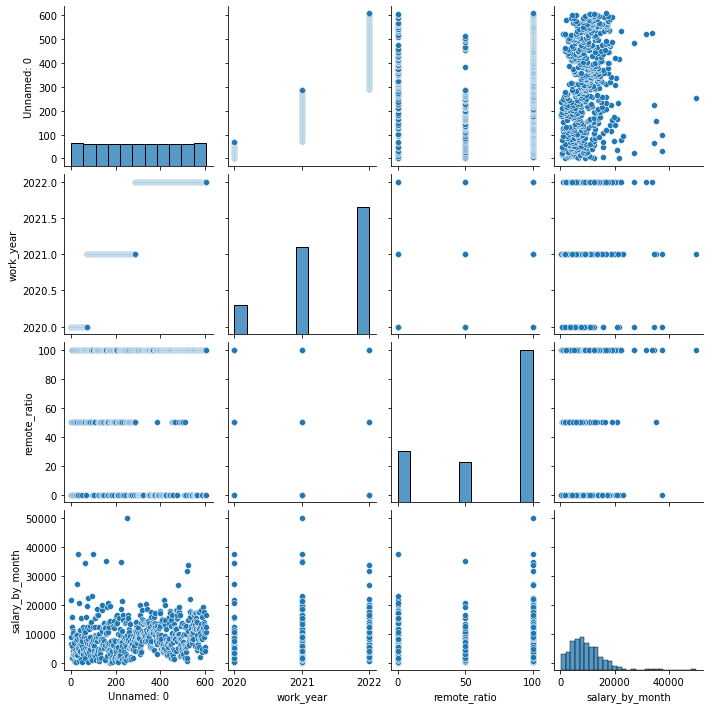

In [29]:
sns.pairplot(ds_salaries_df)